# Choro legends

In [1]:
import geopandas
from geopandas import read_file

In [2]:
import mapclassify

mapclassify.__version__

'2.6.1'

In [3]:
import libpysal

libpysal.__version__

'4.8.0'

In [4]:
libpysal.examples.available()

,Name,Description,Installed
0,10740,"Albuquerque, New Mexico, Census 2000 Tract Dat...",True
1,AirBnB,"Airbnb rentals, socioeconomics, and crime in C...",False
2,Atlanta,"Atlanta, GA region homicide counts and rates",False
3,Baltimore,Baltimore house sales prices and hedonics,False
4,Bostonhsg,Boston housing and neighborhood data,False
...,...,...,...
93,taz,Traffic Analysis Zones in So. California,False
94,tokyo,Tokyo Mortality data,True
95,us_income,Per-capita income for the lower 48 US states 1...,True
96,virginia,Virginia counties shapefile,True


In [5]:
_ = libpysal.examples.load_example("South")
pth = libpysal.examples.get_path("south.shp")

In [19]:
df = read_file(pth)

df

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,Hancock,West Virginia,54,029,54029,54,29,54029,1,1.682864,...,2.557262,0.223645,0.295377,0.332251,0.363934,9.981297,7.800000,9.785797,12.604552,"POLYGON ((-80.62805 40.39816, -80.60204 40.480..."
1,Brooke,West Virginia,54,009,54009,54,9,54009,1,4.607233,...,0.748370,0.220407,0.318453,0.314165,0.350569,10.929337,8.000000,10.214990,11.242293,"POLYGON ((-80.52625 40.16245, -80.58760 40.175..."
2,Ohio,West Virginia,54,069,54069,54,69,54069,1,0.974132,...,3.310334,0.272398,0.358454,0.376963,0.390534,15.621643,12.900000,14.716681,17.574021,"POLYGON ((-80.52517 40.02275, -80.73843 40.035..."
3,Marshall,West Virginia,54,051,54051,54,51,54051,1,0.876248,...,0.546097,0.227647,0.319580,0.320953,0.377346,11.962834,8.800000,8.803253,13.564159,"POLYGON ((-80.52447 39.72113, -80.83248 39.718..."
4,New Castle,Delaware,10,003,10003,10,3,10003,1,4.228385,...,16.480294,0.256106,0.329678,0.365830,0.332703,12.035714,10.700000,15.169480,16.380903,"POLYGON ((-75.77270 39.38301, -75.79144 39.723..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,Halifax,Virginia,51,083,51083,51,83,51083,1,18.513376,...,38.751041,0.364231,0.393521,0.368059,0.371885,15.285003,12.642743,15.191856,17.064510,"POLYGON ((-79.14433 36.54606, -79.21706 36.549..."
1408,Rockbridge,Virginia,51,163,51163,51,163,51163,1,4.159907,...,5.472362,0.312941,0.360766,0.355868,0.372557,14.075977,9.407719,11.121569,12.111944,"POLYGON ((-79.43775 37.61596, -79.45834 37.603..."
1409,Roanoke,Virginia,51,161,51161,51,161,51161,1,5.403098,...,2.993559,0.250404,0.316042,0.333835,0.324549,8.288560,6.899449,11.326885,11.866653,"POLYGON ((-80.12475 37.12510, -80.14045 37.128..."
1410,York,Virginia,51,199,51199,51,199,51199,1,1.544425,...,12.534861,0.271201,0.279962,0.310047,0.326229,8.776244,6.300000,8.063281,9.825284,"POLYGON ((-76.39569 37.10771, -76.40270 37.090..."


## Default legend formatting

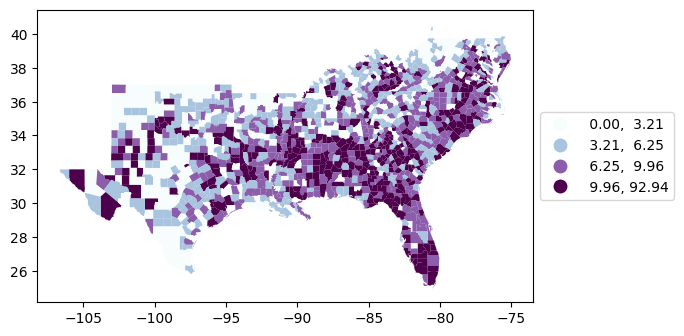

In [7]:
%matplotlib inline
ax = df.plot(
    column="HR60",
    scheme="QUANTILES",
    k=4,
    cmap="BuPu",
    legend=True,
    legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)},
)

In [8]:
labels = [t.get_text() for t in ax.get_legend().get_texts()]
labels

[' 0.00,  3.21', ' 3.21,  6.25', ' 6.25,  9.96', ' 9.96, 92.94']

In [9]:
q4 = mapclassify.Quantiles(df.HR60, k=4)
q4

Quantiles

   Interval      Count
----------------------
[ 0.00,  3.21] |   353
( 3.21,  6.25] |   353
( 6.25,  9.96] |   353
( 9.96, 92.94] |   353

In [10]:
labels == q4.get_legend_classes()

False

Note that in this case, the first interval is closed on the minimum value in the dataset. The other intervals have an open lower bound. This can be now displayed in the legend using `legend_kwds={'interval': True}`.

## Overriding numerical format

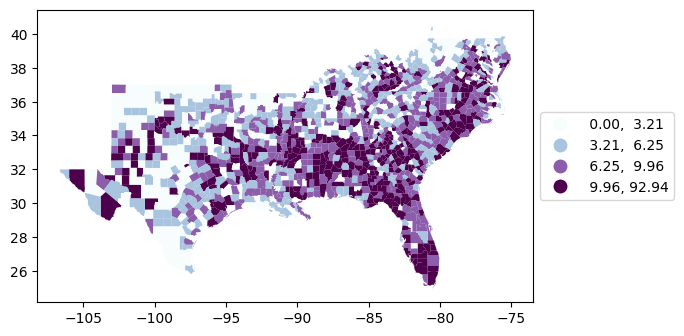

In [11]:
ax = df.plot(
    column="HR60",
    scheme="QUANTILES",
    k=4,
    cmap="BuPu",
    legend=True,
    legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)},
)

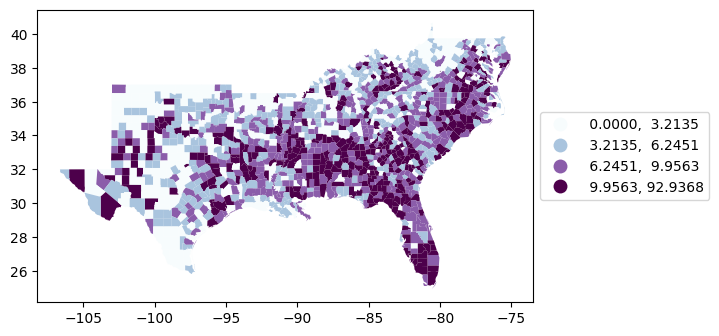

In [12]:
ax = df.plot(
    column="HR60",
    scheme="QUANTILES",
    k=4,
    cmap="BuPu",
    legend=True,
    legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5), "fmt": "{:.4f}"},
)

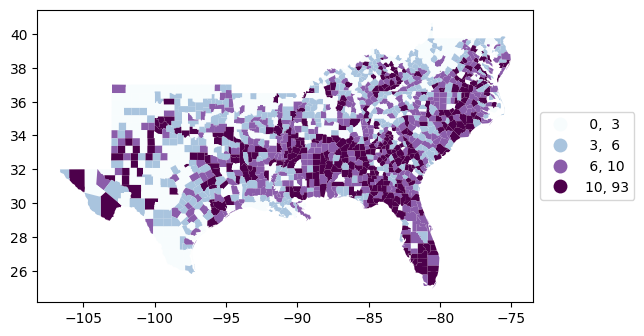

In [13]:
ax = df.plot(
    column="HR60",
    scheme="QUANTILES",
    k=4,
    cmap="BuPu",
    legend=True,
    legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5), "fmt": "{:.0f}"},
)

The new legends_kwds arg `fmt` takes a string to set the numerical formatting.

## When first class lower bound < y.min()

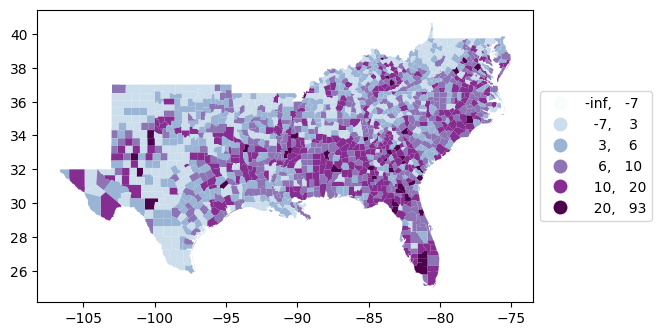

In [14]:
ax = df.plot(
    column="HR60",
    scheme="BoxPlot",
    cmap="BuPu",
    legend=True,
    legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5), "fmt": "{:.0f}"},
)

In [15]:
bp = mapclassify.BoxPlot(df.HR60)
bp

BoxPlot

   Interval      Count
----------------------
( -inf, -6.90] |     0
(-6.90,  3.21] |   353
( 3.21,  6.25] |   353
( 6.25,  9.96] |   353
( 9.96, 20.07] |   311
(20.07, 92.94] |    42

In [16]:
bp.get_legend_classes(fmt="{:.0f}")

['(-inf,   -7]',
 '(  -7,    3]',
 '(   3,    6]',
 '(   6,   10]',
 '(  10,   20]',
 '(  20,   93]']

In some classifiers the user should be aware that the lower (upper) bound of the first (last) interval is not equal to the minimum (maximum) of the attribute values. This is useful to detect extreme values and highly skewed distributions.

## Show interval bracket

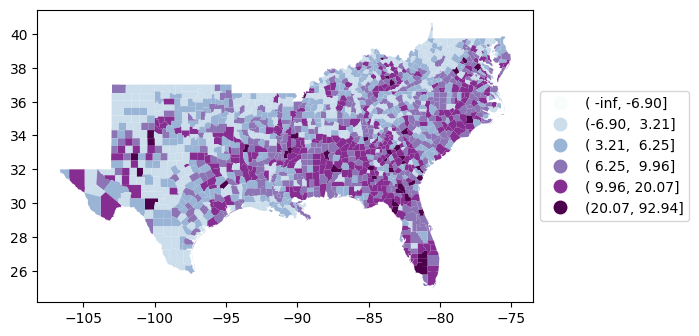

In [17]:
ax = df.plot(
    column="HR60",
    scheme="BoxPlot",
    cmap="BuPu",
    legend=True,
    legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5), "interval": True},
)

## Categorical Data

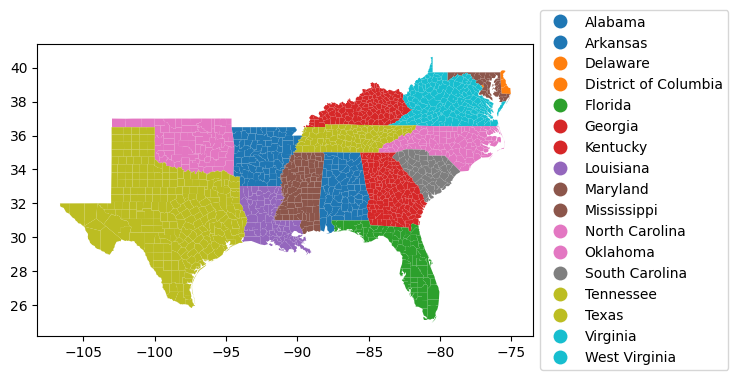

In [18]:
ax = df.plot(
    column="STATE_NAME",
    categorical=True,
    legend=True,
    legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5), "fmt": "{:.0f}"},
)  # fmt is ignored for categorical data